# Prédiction de crédit
***

![alt text](https://i.pinimg.com/originals/b8/83/3a/b8833a9da1cf3e190ae5b0fb6f2e8c6f.jpg)
***

## Introduction

L'idée de ce projet est de déduire si un profil, une personne avec des informations diverses sera en mesure de contracter un crédit.

Pour cela, plusieurs types de données permettent de prédire le statu d'un prêt dans le futur. Par exemple, le taux d'intérêt, la note du prêt, le montant, le revenu de l'agent, l'historique de prêt etc.

## 1. Préparation des données
Il s'agit de comprendre les données et de les préparer afin d'élaborer un modèle performant.

In [2]:
#Import des différentes librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Les données choisies proviennent d'un [datasets de kaggle]("https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset").

In [3]:
#Import du dataset 
credit_df = pd.read_csv("../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
credit_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Information concernant le dataset
print(credit_df.info())
print("Le dataset est de taille " + str(credit_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Le dataset est de taille (614, 13)


On constate qu'il y a beaucoup de colonnes object et cela impliquera que par la suite, pour que le modèle créé soit performant, il faille transformer ces dernières en booléen.
Le dataset possède donc bien 13 colonnes et 614 lignes.

In [5]:
#Repérer les valeurs manquantes
credit_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#On remplace les valeurs manquantes de la colonne LoanAmount par la moyenne de la colonne
credit_df['LoanAmount'].fillna((credit_df['LoanAmount'].mean()), inplace = True)

#On remplace les valeurs manquantes de la colonne Credit History par la valeur médiane de la colonne
credit_df['Credit_History'].fillna((credit_df['Credit_History'].median()), inplace = True)

#On supprime toutes les autres valeurs manquantes
credit_df.dropna(inplace=True)

credit_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Le dataset est maintenant sans aucunes valeurs manquante ce qui nous permet de faire un début d'analyse 

In [7]:
credit_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## 2. Analyse Statistique 
---

### A l'aide des crosstables


In [8]:
#Création d'un crosstab entre le loan status, l'éducation et le mariage des individus
pd.crosstab(credit_df['Loan_Status'], [credit_df.Married, credit_df.Education], normalize=True)

Married            No                    Yes             
Education    Graduate Not Graduate  Graduate Not Graduate
Loan_Status                                              
N            0.101476     0.027675  0.123616     0.053506
Y            0.171587     0.044280  0.387454     0.090406

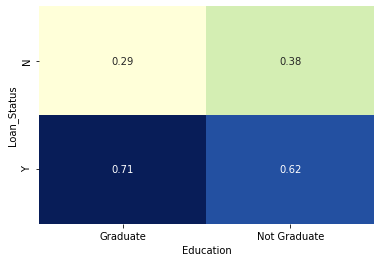

In [9]:
#Création d'une heatmap à partir d'un crosstab
sns.heatmap(pd.crosstab(credit_df['Loan_Status'], credit_df.Education, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False)

On constate que le type d'éducation a un impact difficile sur le status final du crédit, quelque soit le niveau d'éducation, une personne qui contractera un crédit aura presque autant de chance de ne pas être en défaut à son issu.

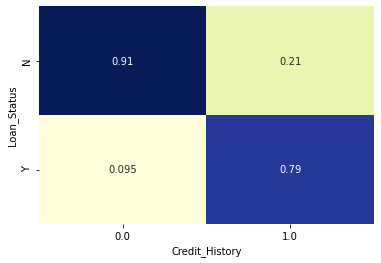

In [10]:
sns.heatmap(pd.crosstab(credit_df['Loan_Status'], credit_df.Credit_History, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False)

Concernant l'historique de crédit, on constate dans ce cas que si l'agent à contracté un crédit auparavant, il aura beaucoup plus de chance d'obtenir à un nouveau un crédit et inversement pour quelqu'un qui n'en a pas déjà eu.

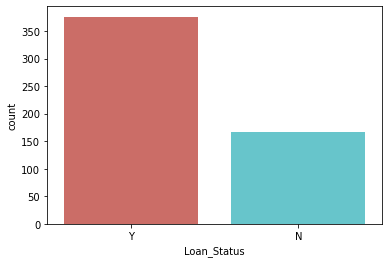

In [11]:
credit_df['Loan_Status'].value_counts()
sns.countplot(x = 'Loan_Status', data=credit_df, palette='hls')
plt.show()

On constate que sur l'entiereté du dataset, une large marjorité ont obtenu leur crédit (plus de 350) mais 150 personnes n'ont pas eu cette chance.

### En réalisant une analyse univarié 

In [12]:
#Décompte du nombre de femmes et d'hommes dans le dataset
credit_df.Gender.value_counts()

Male      444
Female     98
Name: Gender, dtype: int64

On constate que le data set possède largement moins de données de femmes contractant un crédit que d'hommes et cela peut fausser les performances du modèle.

In [13]:
print(credit_df['Education'].value_counts())
print(credit_df['Married'].value_counts())

Graduate        425
Not Graduate    117
Name: Education, dtype: int64
Yes    355
No     187
Name: Married, dtype: int64


Il y a plus de diplomés qui contractent des crédits que de non diplomés ou diplomés "non graduate". On constate aussi que les personnes marriés seront plus probables à contracter un crédit que les personnes non mariés. 

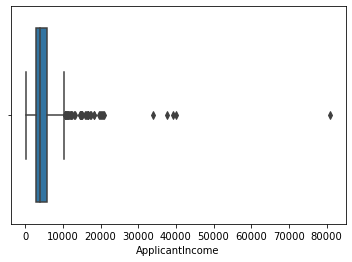

In [14]:
#Création d'un boxplot pour le revenu des agents
sns.boxplot(credit_df["ApplicantIncome"])

On constate des valeurs extrêmes qui pourraient nuirent au bon fonctionnement du modèle, il faudrait par conséquent les supprimer.

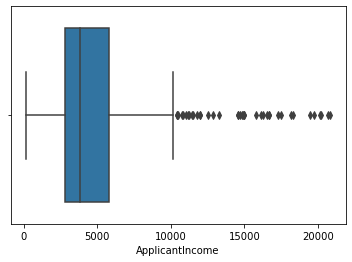

In [15]:
#Création d'un nouveau boxplot en enlevant les valeurs extrêmes hautes
r = credit_df[credit_df["ApplicantIncome"] < 30000 ].ApplicantIncome
sns.boxplot(r)

On déduit que la plupart des emprunteurs on un revenu entre 3000 dollars et 6000 dollars.

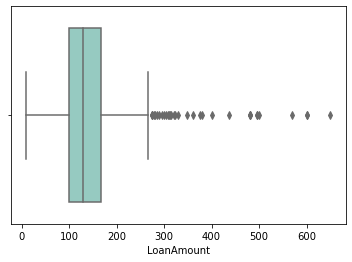

In [16]:
#Boxplot du montant emprunté
sns.boxplot(credit_df["LoanAmount"], palette="Set3")

On constate des montants en moyenne entre 100k et 200k.

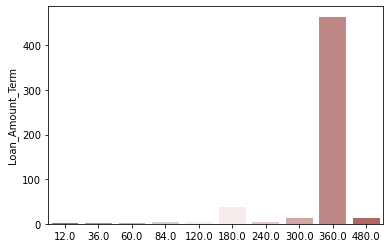

In [17]:
#Création d'un barplot sur la durée des prêts
p = credit_df["Loan_Amount_Term"].value_counts()
sns.barplot(x=p.index, y=p, palette="vlag")

On voit une large majorité de prêts contractés pour 360 mois.

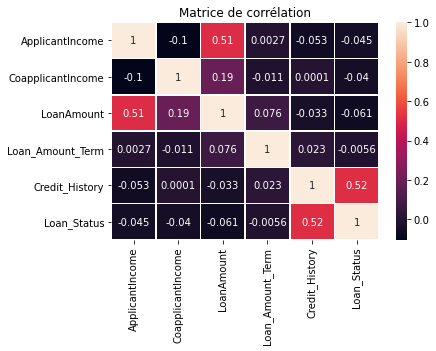

In [18]:
#On remplace les valeurs de la colonne par des 0 et 1
credit_df['Loan_Status'].replace('N',0,inplace=True)
credit_df['Loan_Status'].replace('Y',1,inplace=True)

#Création d'une matrice de corrélation
plt.title('Matrice de corrélation')
sns.heatmap(credit_df.corr(),annot=True, linewidths=.5)

On perçoit une importante corrélation entre l'historique de crédit et le statut du crédit. C'est globalement la seule réèle corrélation qu'on peut retenir. Il faut donc faire en sorte de mettre de coté ces variables qui n'apporteraient pas de plus au modèle.

### Data processing

In [19]:
#On enlève les colonnes qui ne nous intéressent plus
credit_df2=credit_df.drop(labels=['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Loan_ID'],axis=1)
credit_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,146.412162,1.0,Urban,1
1,Male,Yes,1,Graduate,No,128.000000,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,66.000000,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,120.000000,1.0,Urban,1
4,Male,No,0,Graduate,No,141.000000,1.0,Urban,1


Il faut maintenant transformer les valeurs texte en valeurs booléennes pour pouvoir analyser les liens avec la variable de sortie (le loan_status).
Pour cela, on utilise une méthode appelée la One hot encoding. 

In [20]:
#On s'occupe d'abord de la colonne dependents et property area qui ne seraient pas divisées en deux mais en plus ce qui ajouterait trop de colonnes
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
credit_df2['Property_Area']=label.fit_transform(credit_df2['Property_Area'])
credit_df2['Dependents']=label.fit_transform(credit_df2['Dependents'])

#On sépare les valeurs numériques et non numériques
credit_num = credit_df2.select_dtypes(exclude=['object'])
credit_nonum = credit_df2.select_dtypes(include=['object'])

#On transforme les valeurs non numériques en numériques avec la one hot
credit_onehot=pd.get_dummies((credit_nonum))

#On rassemble tout
credit_df2=pd.concat([credit_num, credit_onehot], axis=1)
credit_df2.head()

,Dependents,LoanAmount,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,146.412162,1.0,2,1,0,1,1,0,1,0,1,0
1,1,128.000000,1.0,0,0,0,1,0,1,1,0,1,0
2,0,66.000000,1.0,2,1,0,1,0,1,1,0,0,1
3,0,120.000000,1.0,2,1,0,1,0,1,0,1,1,0
4,0,141.000000,1.0,2,1,0,1,1,0,1,0,1,0


Comme certaines colonnes représentaient le fait d'être une valeur ou d'être une autre, on se retrouve avec des colonnes qui veulent dire la même chose: exemple, la colonne mariés ou non mariés. Il faut donc supprimer celles qui sont redondantes.

In [21]:
credit_df2=credit_df2.drop(labels=['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No'],axis=1)
credit_df2.head()

,Dependents,LoanAmount,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes
0,0,146.412162,1.0,2,1,1,0,1,0
1,1,128.000000,1.0,0,0,1,1,1,0
2,0,66.000000,1.0,2,1,1,1,1,1
3,0,120.000000,1.0,2,1,1,1,0,0
4,0,141.000000,1.0,2,1,1,0,1,0


In [22]:
#La taille a changé
credit_df2.shape

(542, 9)

## 3. Modélisation dans le but de prédiction

In [23]:
#Pour modéliser, il faut distinguer la variable de sortie y et les variables X
X = credit_df2.drop('Loan_Status', axis = 1)
y = credit_df2[['Loan_Status']]

### Régression logistique

In [24]:
#Import de statsmodels et régression logistique sur y et X
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.504826
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  542
Model:                          Logit   Df Residuals:                      534
Method:                           MLE   Df Model:                            7
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.1806
Time:                        12:23:59   Log-Likelihood:                -273.62
converged:                       True   LL-Null:                       -333.92
Covariance Type:            nonrobust   LLR p-value:                 5.730e-23
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Dependents            -0.0156      0.114     -0.137      0.891      -0.239       0.208
LoanA

Certains paramètres sont inefficaces et l'on constate ça de part leur p-value supérieure à 0.05, il faut donc les évincer.

In [25]:
credit_df3=credit_df2.drop(labels=['Dependents', 'Property_Area', 'Education_Graduate', 'Self_Employed_Yes'],axis=1)
credit_df3.head()

,LoanAmount,Credit_History,Loan_Status,Gender_Male,Married_Yes
0,146.412162,1.0,1,1,0
1,128.000000,1.0,0,1,1
2,66.000000,1.0,1,1,1
3,120.000000,1.0,1,1,1
4,141.000000,1.0,1,1,0


In [26]:
#Création d'un résumé du modèle avec statsmodels
X = credit_df3.drop('Loan_Status', axis = 1)
y = credit_df3[['Loan_Status']]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506199
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  542
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.1784
Time:                        12:23:59   Log-Likelihood:                -274.36
converged:                       True   LL-Null:                       -333.92
Covariance Type:            nonrobust   LLR p-value:                 1.195e-25
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
LoanAmount        -0.0044      0.001     -3.832      0.000      -0.007      -0.002
Credit_History   

In [27]:
#On partage le dataset en set de test et d'entrainement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [28]:
#Régression logistique avec scikitlearn
from sklearn.linear_model import LogisticRegression
loan_logistic = LogisticRegression(penalty='none',solver='newton-cg')
loan_logistic.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(penalty='none', solver='newton-cg')

In [29]:
#On obtient les probabilités d'octroie de crédits
pred_cred = loan_logistic.predict(X_test)
pred_cred2 = pd.DataFrame(pred_cred)
pred_cred2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [30]:
#Le score de notre régression 
score_reg = loan_logistic.score(X_test,y_test)
print("Score du modèle : %.2f" % score_reg)

Score du modèle : 0.81


81% des prédictions sont correctes (nombre de prédictions correctes sur le nombre de prédictions totales).

[[ 16  31]
 [  0 116]]


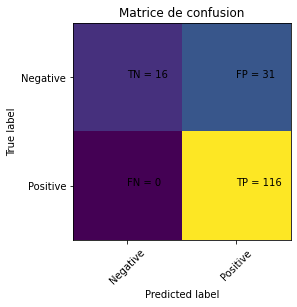

In [31]:
#Création d'une matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_cred)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest')
classNames = ['Negative','Positive']
plt.title('Matrice de confusion')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


Cette matrice à pour but de mettre en avant les prédiction correctes et inccorectes.

TN = True negative 
TP = True positive 
FN = False negative
FP = False positive

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_cred2))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        47
           1       0.79      1.00      0.88       116

    accuracy                           0.81       163
   macro avg       0.89      0.67      0.70       163
weighted avg       0.85      0.81      0.77       163



Le recall, notamment, permet de rendre compte de la précision des prédictions, on constate que toutes les prédictions concernant 1 ont été correctement prédites.

In [33]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,pred_cred2)

(array([1.        , 0.78911565]),
 array([0.34042553, 1.        ]),
 array([0.50793651, 0.88212928]),
 array([ 47, 116]))

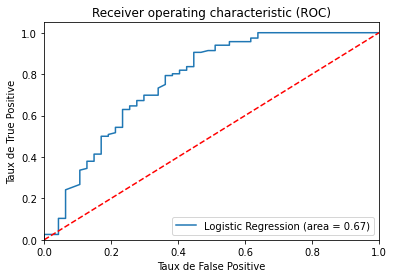

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, loan_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loan_logistic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de False Positive')
plt.ylabel('Taux de True Positive')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Plus l'écart entre la droite à 45 degrés et la ROC est élevé, plus le modèle est précis.

### Arbre de décision

In [35]:
#Création d'un arbre de décision avec la librarie scikit learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#On appelle l'arbre de classification tree_class sachant que par défault, le critère de classificaiton est celui de gini
tree_class = DecisionTreeClassifier()

# Entrainement de l'arbre
loan_tree = tree_class.fit(X_train,y_train)

#Prédiction des réponses
tree_pred = tree_class.predict(X_test)
tree_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1])

In [36]:
#Le score du modèle
score_arbre = tree_class.score(X_test,y_test)
print("Score du modèle : %.2f" % score_arbre)

Score du modèle : 0.67


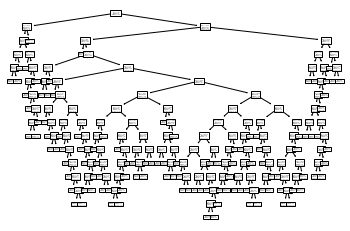

In [60]:
#Visualisation de l'arbre
tree.plot_tree(tree_class)
plt.show()

In [38]:
#Nouveaux paramètres
tree_class2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Entrainement de l'arbre
loan_tree2 = tree_class2.fit(X_train,y_train)

#Prédiction des réponses
tree_pred2 = tree_class2.predict(X_test)
tree_pred2

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
score_arbre2 = tree_class2.score(X_test,y_test)
print("Score du modèle : %.2f" % score_arbre2)

Score du modèle : 0.77


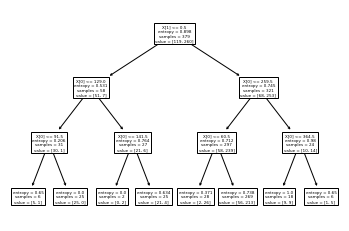

In [40]:
tree.plot_tree(tree_class2)
plt.show()

In [57]:
#Matrice de confusion
cm2 = confusion_matrix(y_test, tree_pred2)
print(cm2)

[[ 13  34]
 [  4 112]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_pred2))

              precision    recall  f1-score   support

           0       0.76      0.28      0.41        47
           1       0.77      0.97      0.85       116

    accuracy                           0.77       163
   macro avg       0.77      0.62      0.63       163
weighted avg       0.77      0.77      0.73       163



### Machine à vecteurs de supports (Support Vector Machines)

In [44]:
from sklearn.svm import LinearSVC

svc_class = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)

# Entrainement du SVC
loan_svc = svc_class.fit(X_train,y_train)

#Prédiction des réponses
svc_pred = svc_class.predict(X_test)
svc_pred

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [45]:
score_svc = svc_class.score(X_test, y_test)
print("Score du modèle : %.2f" % score_svc)

Score du modèle : 0.81


### Méthode des k plus proches voisins (KNeighbors Classifier)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
score_knn = knn.score(X_test, y_test)
print("Score du modèle : %.2f" % score_knn)

Score du modèle : 0.65


### Conclusion

In [48]:
models = [loan_logistic, tree_class2, svc_class, knn]
models_name = ['Logistique régression', 'Arbre de décision', 'SVC', 'KNeighbors Classifier']

#Boucle for des scores
for (i, j) in zip(models, models_name):
     print("Score du modèle " + j + " : %.2f" % i.score(X_test, y_test))

Score du modèle Logistique régression : 0.81
Score du modèle Arbre de décision : 0.77
Score du modèle SVC : 0.81
Score du modèle KNeighbors Classifier : 0.65


In [58]:
#Boucle for du classification report
for (i, j) in zip(models, models_name):
    print(j)
    print(classification_report(y_test, i.predict(X_test)))

Logistique régression
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        47
           1       0.79      1.00      0.88       116

    accuracy                           0.81       163
   macro avg       0.89      0.67      0.70       163
weighted avg       0.85      0.81      0.77       163

Arbre de décision
              precision    recall  f1-score   support

           0       0.76      0.28      0.41        47
           1       0.77      0.97      0.85       116

    accuracy                           0.77       163
   macro avg       0.77      0.62      0.63       163
weighted avg       0.77      0.77      0.73       163

SVC
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        47
           1       0.79      1.00      0.88       116

    accuracy                           0.81       163
   macro avg       0.89      0.67      0.70       163
weighted avg       0.85      0

Les modèles de régression logistique et de machine à vecteurs de supports sont les meilleurs modèles obtenus. Ils prédisent à 81% le statut des crédits selon les informations données. Le modèle des k proches voisins est lui le moins efficace de tous. 

Le niveau de précision des modèles peut être améliorer en modifiant les paramètres à l’intérieur d’eux. 

La possibilité de modifier le data frame qui sert d’entrainement est aussi une possibilité pour que la précision voulu augmente. Dans notre cas, nous avons évincé des colonnes et donc des variables explicatives mais cela peut ne pas être fait et permettre aux résultats d’être éventuellement meilleurs.